# Example

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from load_data import get_projections_spacing_radius
from psf_fit import get_psf_kernel
from ipywidgets import interact, widgets

Before running the python code for analysis, you will need to generate PSF data to fit using SIMIND. The `simind.smc` file is the default one I leave here. I generate my own data by running the commands:

`simind 440keV_r35/53:1/59:1/01:440/26:500/12:35`

Note that index 01 changes the energy (`01:440`) and index 12 changes the radius (`12:35`). I use these numbers when generating the filename (`440kev_r35`). As can be seen below, I ran 6 SIMIND simulations corresponding to 6 different radii.

Open data:

In [2]:
ds = [10,15,20,25,30,35]
paths = [f'440kev_r{d}' for d in ds]

Get PSF kernel:
* What is returned is a function which takes in 3 arguments: x positions, y positions, and distance from the detector.

In [3]:
kernel_f = get_psf_kernel(paths)

Lets validate the kernel at each point

In [83]:
# Spacing of the theoretical kernel
Nx = 255
dx = 0.12
x_eval = y_eval = np.arange(-(Nx-1)/2, (Nx+1)/2, 1) * dx
projectionss_data = []
projectionss_analytical = []
for path in paths:
    projections_data, dr, distance = get_projections_spacing_radius(path)
    projections_analytical = kernel_f(x_eval, y_eval, d=distance)
    projectionss_data.append(projections_data)
    projectionss_analytical.append(projections_analytical)

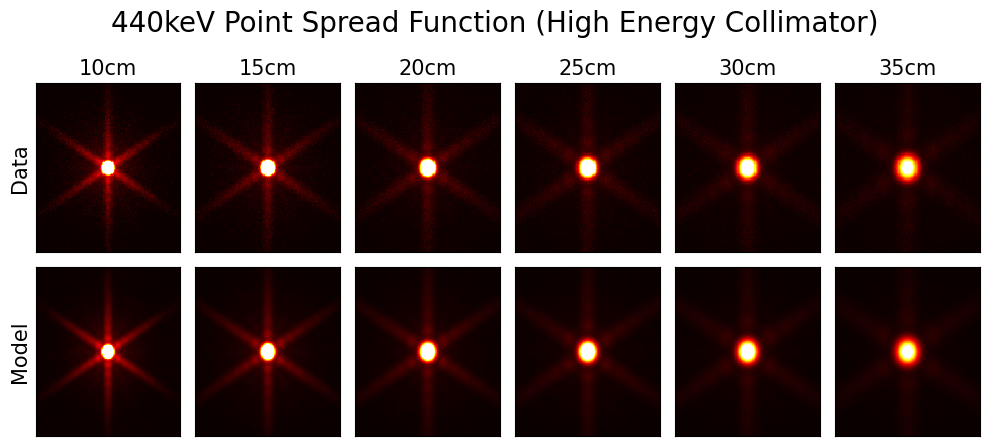

In [119]:
def plot(projections, ax):
    ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
    return ax.pcolormesh(projections, cmap='hot', vmax=0.1)

fig, axes = plt.subplots(2,6,figsize=(10, 4.5))
for i, ax in enumerate(axes[0]):
    C = plot(projectionss_data[i], ax)
for i, ax in enumerate(axes[1]):
    C = plot(projectionss_analytical[i], ax,)
for i, ax in enumerate(axes[0]):
    ax.set_title(f'{ds[i]}cm', fontsize=15)
axes[0,0].set_ylabel('Data', fontsize=15)
axes[1,0].set_ylabel('Model', fontsize=15)
fig.suptitle('440keV Point Spread Function (High Energy Collimator)', fontsize=20)
fig.tight_layout()
plt.savefig('im.png', dpi=300)

Create an interactive plot

In [120]:
def plot_function(parameter):
    x_eval = y_eval = np.arange(-(Nx-1)/2, (Nx+1)/2, 1) * dx
    z_eval = kernel_f(x_eval, y_eval, d=parameter)
    plt.figure(figsize=(5, 5.5))
    plt.pcolormesh(z_eval, cmap='hot', vmax=0.1)
    plt.axis('off')
    plt.show()
    
parameter_slider = widgets.FloatSlider(
    value=25,  # Initial value of the parameter
    min=10,    # Minimum value
    max=40,    # Maximum value
    step=0.1,   # Step size
    description='R [cm]:',
)

interact(plot_function, parameter=parameter_slider)

interactive(children=(FloatSlider(value=25.0, description='R [cm]:', max=40.0, min=10.0), Output()), _dom_clas…

<function __main__.plot_function(parameter)>